* @Author : Pramil Paudel, Sumit Bhattarai
* Development Env : Jupyter Lab
* Module : Preprocessing 
* Summary : This module will create a data using some data modulation technique and create an interactive data to visulization to understand more about data. 

In [1]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from mpl_toolkits.mplot3d import Axes3D
from pandas.plotting import scatter_matrix
from IPython.display import Image
import pydotplus
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from fbprophet import Prophet
print("Loaded Successfully -- -- -- -- -- -- -- -- -- -- -- -- --")

Loaded Successfully -- -- -- -- -- -- -- -- -- -- -- -- --


/Users/patthar/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
source_path = "../../data/pre_processing/"

#### One careful assumption here is leading 0 in FIPS codes are removed as data is of int type in source so they are preserved here.

In [3]:
us_road_accident_df_0 = pd.read_csv(source_path+"xaa", dtype={'State_FIPS_Code': object,"County_FIPS_Code":object })
us_road_accident_df_0.head()

Unnamed: 0   ID  Severity           Start_Time             End_Time  \
0           0  A-1         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1           1  A-2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2           2  A-3         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3           3  A-4         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4           4  A-5         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng                     Street Side          City  ...  \
0  39.865147 -84.058723                     I-70 E    R        Dayton  ...   
1  39.928059 -82.831184                   Brice Rd    L  Reynoldsburg  ...   
2  39.063148 -84.032608             State Route 32    R  Williamsburg  ...   
3  39.747753 -84.205582                     I-75 S    R        Dayton  ...   
4  39.627781 -84.188354  Miamisburg Centerville Rd    R        Dayton  ...   

  Roundabout Station   Stop Traffic_Calming Traffic_Signal Turning_Loop  \
0      False   False  False           False          False        False   
1      False   False  False           False          False        False   
2      False   False  False           False           True        False   
3      False   False  False           False          False        False   
4      False   False  False           False           True        False   

  Sunrise_Sunset            countyState  State_FIPS_Code  County_FIPS_Code  
0          Night  Montgomery County, OH               39               113  
1          Night    Franklin County, OH               39               049  
2          Night    Clermont County, OH               39               025  
3          Night  Montgomery County, OH               39               113  
4            Day  Montgomery County, OH               39               113  

[5 rows x 40 columns]

In [4]:
def plot_pie_chart(col):
    us_road_accident_df_0.groupby(col).size().plot.pie(title ="Pie chart based on" + col, figsize=(5,5))
    plt.show()

In [5]:
def plot_bar_chart(col):
    colors = ["rosybrown","darksalmon","sandybrown","seagreen","khaki","lightblue","plum","y"]
    us_road_accident_df_0.groupby(col).size().plot.bar(figsize=(25,3),title="Bar Plot based on " + col ,color =random.choice(colors))
    plt.show()

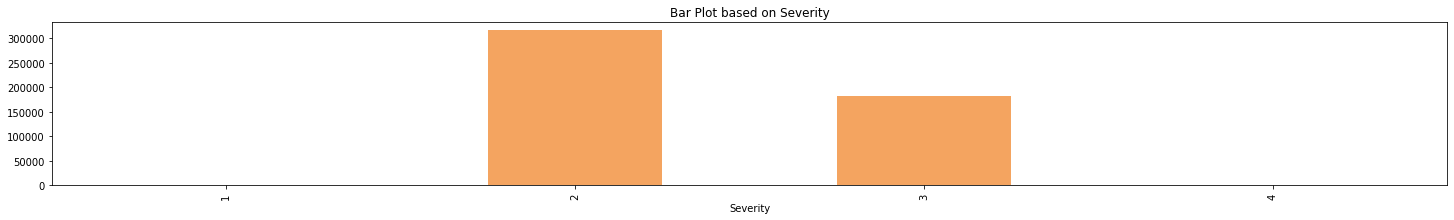

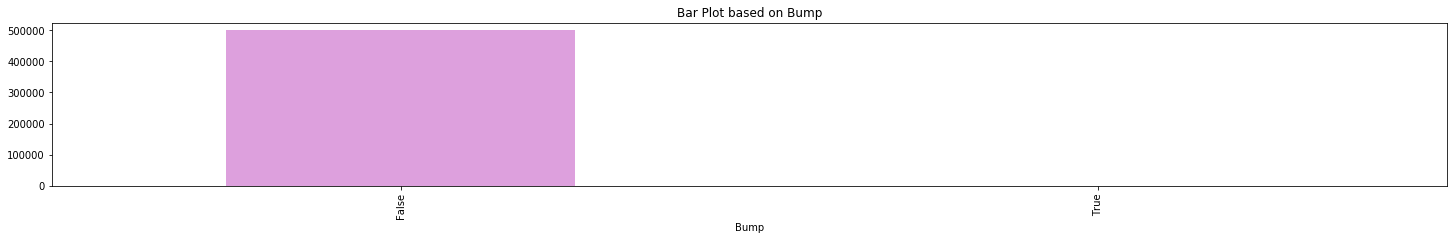

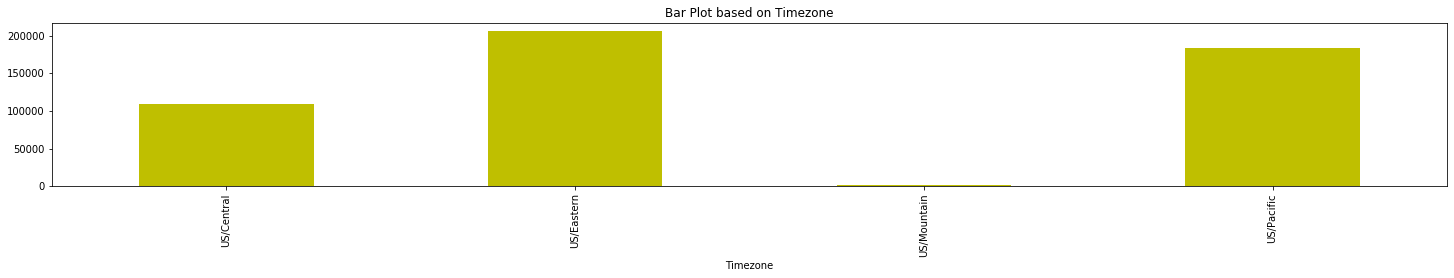

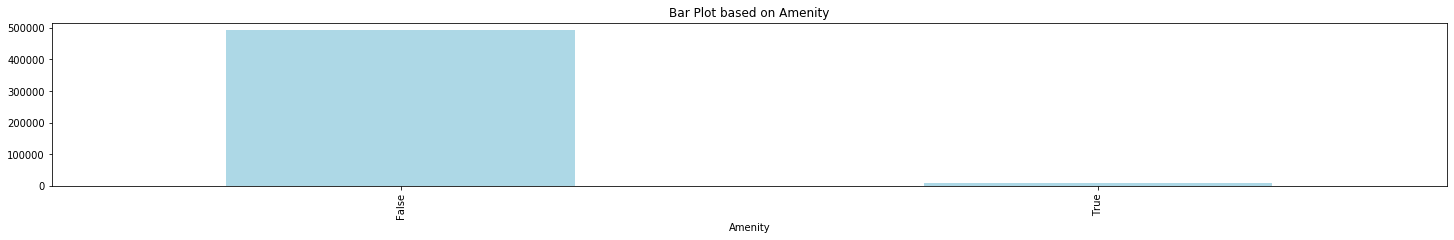

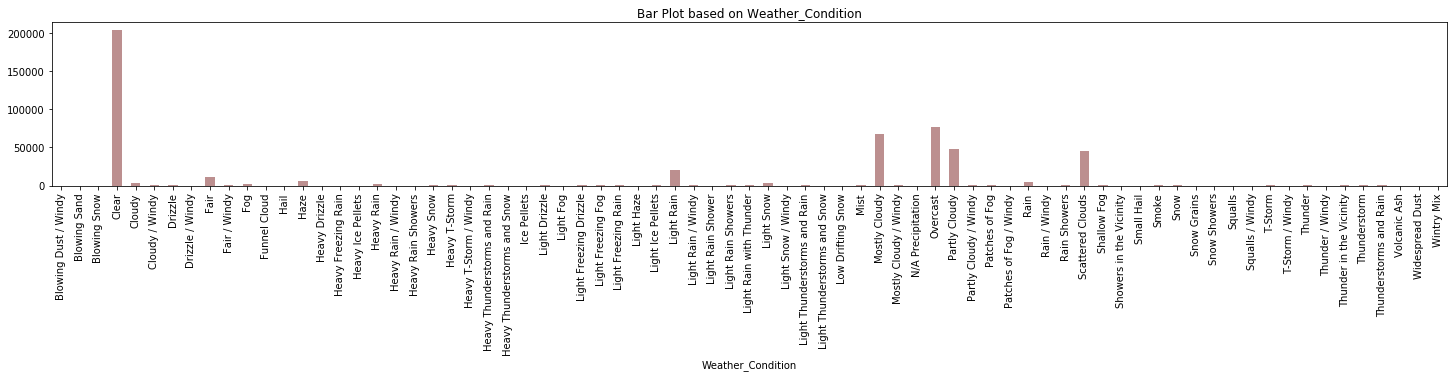

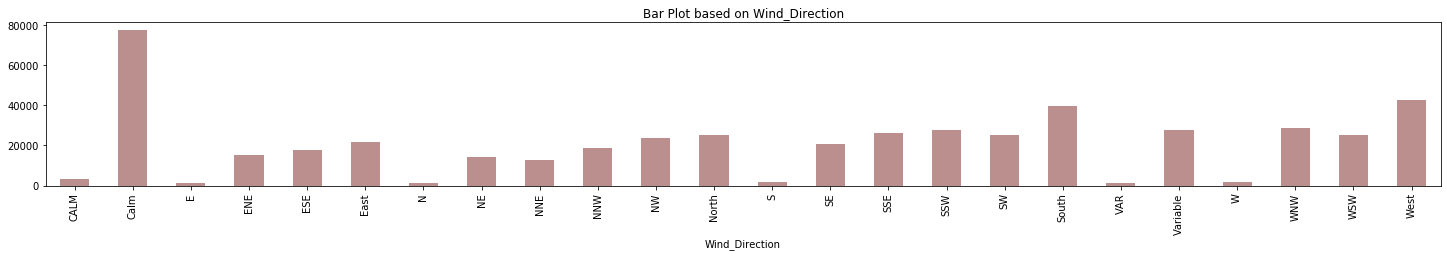

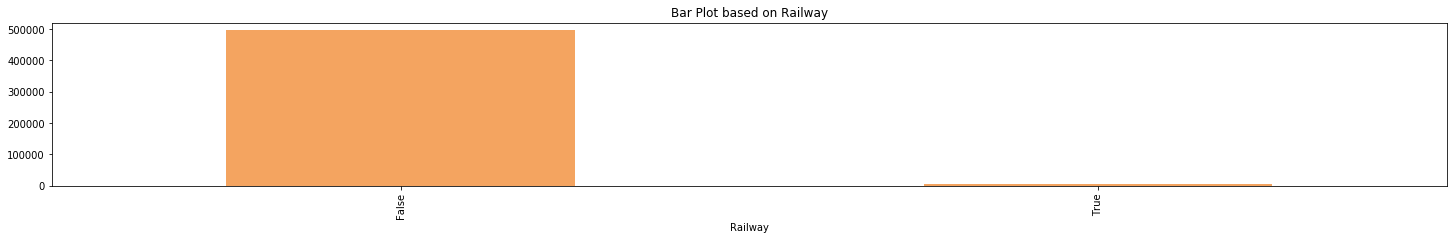

In [6]:
for col in ["Severity","Bump","Timezone","Amenity","Weather_Condition","Wind_Direction","Railway"]: 
    plot_bar_chart(col)

In [7]:
def plot_state_wise_usa_count(df,title,color):
    import plotly.graph_objects as go
    fig = go.Figure(data=go.Choropleth(
        locations=df['State'],
        z=df['Count'].astype(float),
        locationmode='USA-states',
        colorscale=color,
        autocolorscale=False,
#         text="dummy", # hover text
        marker_line_color='white', # line markers between states
        colorbar_title="Total Accident"
    ))

    fig.update_layout(
        title_text=title,
        geo = dict(
            scope='usa',
            projection=go.layout.geo.Projection(type = 'albers usa'),
            showlakes=True, # lakes
            lakecolor='rgb(255, 255, 255)'),
    )
    fig.show()

### Total number of accidents based on State

In [8]:
road_accident_by_state = us_road_accident_df_0.groupby(['State'])['ID'].count().to_frame(name="Count").reset_index()
road_accident_by_state.head()

State   Count
0    AL     592
1    AR       6
2    AZ     704
3    CA  170707
4    CO     186

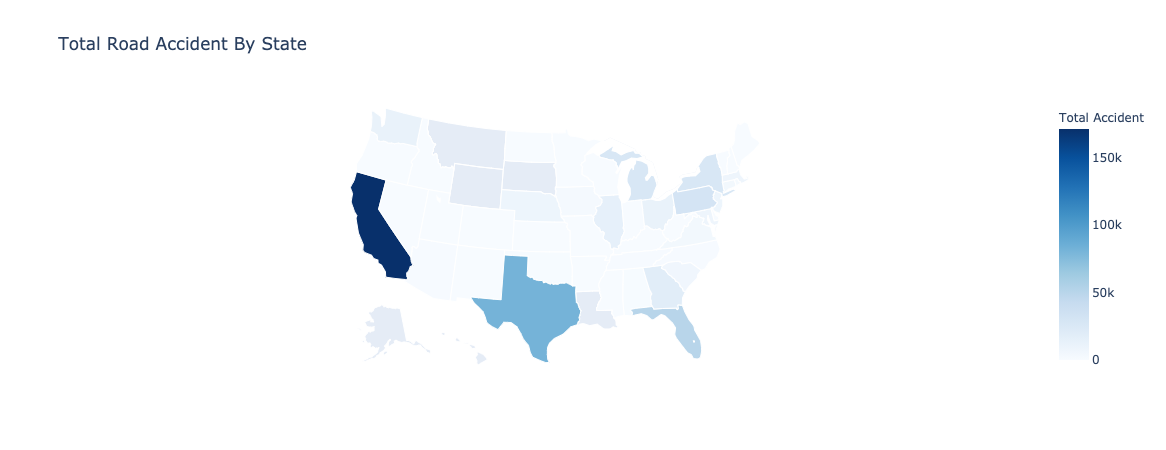

In [9]:
plot_state_wise_usa_count(road_accident_by_state,"Total Road Accident By State","blues")

# Total Accident for Each County

In [29]:
def plot_data_by_county_total_usa(df):
    import plotly.figure_factory as ff
    
    colorscale = [
    'rgb(193, 193, 193)',
    'rgb(239,239,239)',
    'rgb(195, 196, 222)',
    'rgb(144,148,194)',
    'rgb(101,104,168)',
    'rgb(65, 53, 132)'
    ]
    values = df['Count'].tolist()
    fips = df['FIPS'].tolist()
    fig = ff.create_choropleth(fips=fips, values=values,binning_endpoints=[500, 1000, 5000, 10000, 20000], colorscale=colorscale,)
    fig.layout.template = None
    fig.show()

In [30]:
road_accident_by_county = us_road_accident_df_0.groupby(['State_FIPS_Code','County_FIPS_Code'])['ID'].count().to_frame(name="Count").reset_index()

In [31]:
## Total county wise 
road_accident_by_county['FIPS'] = road_accident_by_county.State_FIPS_Code+road_accident_by_county.County_FIPS_Code
road_accident_by_county.head()

State_FIPS_Code County_FIPS_Code  Count   FIPS
0              01              001      5  01001
1              01              003     12  01003
2              01              005      2  01005
3              01              009     13  01009
4              01              011      2  01011

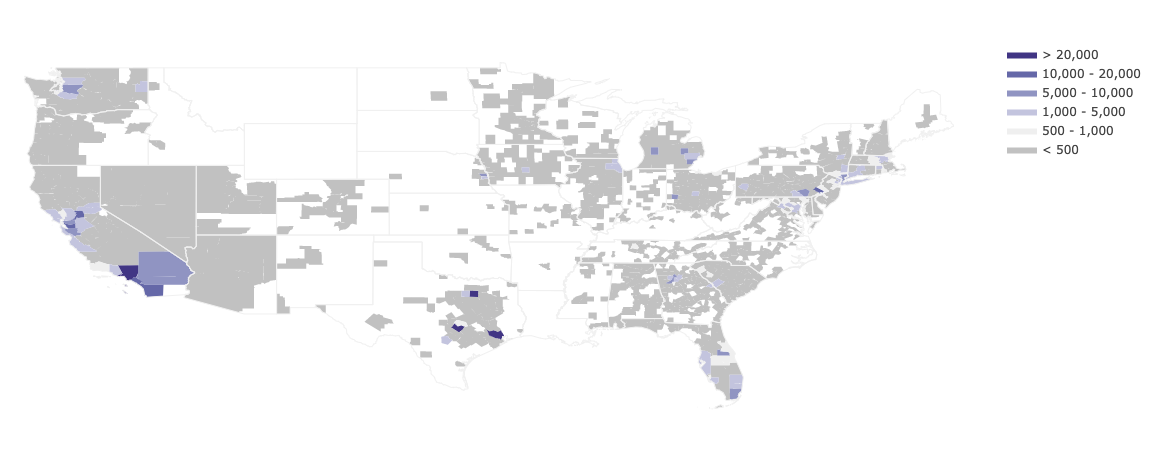

In [32]:
plot_data_by_county_total_usa(road_accident_by_county)

# Accident Happening at Night

In [33]:
road_accident_at_night = us_road_accident_df_0.loc[us_road_accident_df_0['Sunrise_Sunset'] =="Night"]
road_accident_at_night.head()

Unnamed: 0    ID  Severity           Start_Time             End_Time  \
0            0   A-1         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1            1   A-2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2            2   A-3         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3            3   A-4         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
32          32  A-33         3  2016-02-08 18:24:00  2016-02-08 21:00:00   

    Start_Lat  Start_Lng          Street Side          City  ... Roundabout  \
0   39.865147 -84.058723          I-70 E    R        Dayton  ...      False   
1   39.928059 -82.831184        Brice Rd    L  Reynoldsburg  ...      False   
2   39.063148 -84.032608  State Route 32    R  Williamsburg  ...      False   
3   39.747753 -84.205582          I-75 S    R        Dayton  ...      False   
32  40.042725 -82.997307     North Fwy S    R      Columbus  ...      False   

   Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0    False  False           False          False        False          Night   
1    False  False           False          False        False          Night   
2    False  False           False           True        False          Night   
3    False  False           False          False        False          Night   
32   False  False           False          False        False          Night   

              countyState  State_FIPS_Code  County_FIPS_Code  
0   Montgomery County, OH               39               113  
1     Franklin County, OH               39               049  
2     Clermont County, OH               39               025  
3   Montgomery County, OH               39               113  
32    Franklin County, OH               39               049  

[5 rows x 40 columns]

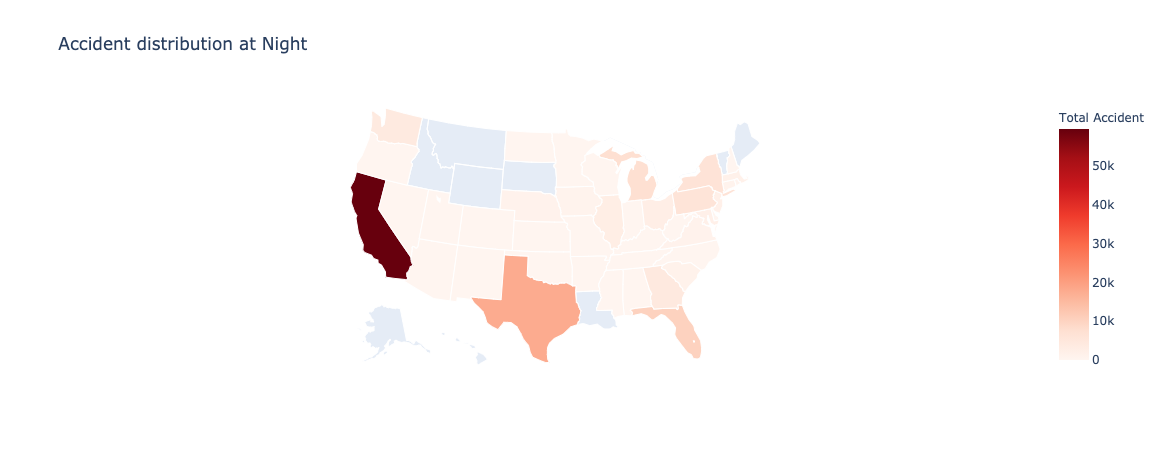

In [34]:
road_accident_at_night_state = road_accident_at_night.groupby(['State'])['ID'].count().to_frame(name="Count").reset_index()
plot_state_wise_usa_count(road_accident_at_night_state, "Accident distribution at Night", "reds")

# Most Severe Accident Distribution in USA

In [35]:
most_severe_accident = us_road_accident_df_0.loc[us_road_accident_df_0['Severity'] ==4]
most_severe_accident.head()

Unnamed: 0      ID  Severity           Start_Time             End_Time  \
617          617   A-620         4  2016-03-11 13:18:48  2016-03-11 13:48:48   
1171        1192  A-1198         4  2016-06-24 22:28:49  2016-06-24 22:58:49   
1837        1882  A-1902         4  2016-07-01 14:09:13  2016-07-01 14:39:13   
3986        4095  A-4144         4  2016-07-25 14:23:33  2016-07-25 15:11:13   
4778        4904  A-4965         4  2016-08-01 07:44:37  2016-08-01 08:29:37   

      Start_Lat   Start_Lng                Street Side         City  ...  \
617   39.917412  -83.014236              Frank Rd    R     Columbus  ...   
1171  37.321117 -121.899887               I-280 S    R     San Jose  ...   
1837  37.630623 -122.435043  Junipero Serra Fwy N    R    San Bruno  ...   
3986  37.339115 -121.851807        Bayshore Fwy S    R     San Jose  ...   
4778  37.710648 -122.166687           Marina Blvd    R  San Leandro  ...   

     Roundabout Station   Stop Traffic_Calming Traffic_Signal Turning_Loop  \
617       False   False  False           False          False        False   
1171      False   False  False           False          False        False   
1837      False   False  False           False          False        False   
3986      False   False  False           False          False        False   
4778      False   False  False           False          False        False   

     Sunrise_Sunset             countyState  State_FIPS_Code  County_FIPS_Code  
617             Day     Franklin County, OH               39               049  
1171          Night  Santa Clara County, CA               06               085  
1837            Day    San Mateo County, CA               06               081  
3986            Day  Santa Clara County, CA               06               085  
4778            Day      Alameda County, CA               06               001  

[5 rows x 40 columns]

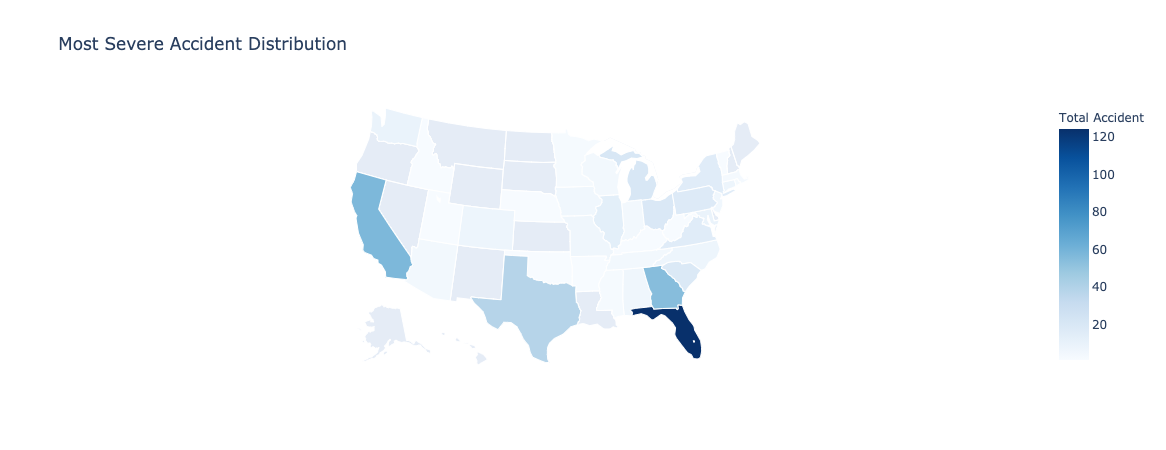

In [36]:
most_severe_accident_count = most_severe_accident.groupby(['State'])['ID'].count().to_frame(name="Count").reset_index()
plot_state_wise_usa_count(most_severe_accident_count, "Most Severe Accident Distribution", "blues")

# Accident Happening Due to Railways

In [42]:
accident_due_railways = us_road_accident_df_0.loc[us_road_accident_df_0['Railway']==True]
accident_due_railways.head()

Unnamed: 0      ID  Severity           Start_Time             End_Time  \
74            74    A-75         2  2016-02-10 06:53:02  2016-02-10 07:23:02   
801          806   A-810         3  2016-06-21 20:02:45  2016-06-21 20:32:45   
917          925   A-930         3  2016-06-22 18:13:45  2016-06-22 18:43:45   
1002        1016  A-1021         2  2016-06-23 12:04:13  2016-06-23 12:34:13   
1570        1607  A-1617         2  2016-06-29 06:29:19  2016-06-29 07:08:00   

      Start_Lat   Start_Lng                  Street Side           City  ...  \
74    39.814526  -84.021744           S Central Ave    R       Fairborn  ...   
801   37.690559 -122.074669                 I-580 E    R  Castro Valley  ...   
917   37.316528 -121.911858            Parkmoor Ave    L       San Jose  ...   
1002  37.552235 -122.308876  J Arthur Younger Fwy W    R      San Mateo  ...   
1570  37.595875 -121.886383                 Bond Ln    L          Sunol  ...   

     Roundabout Station   Stop Traffic_Calming Traffic_Signal Turning_Loop  \
74        False   False  False           False          False        False   
801       False    True  False           False          False        False   
917       False   False  False           False          False        False   
1002      False   False  False           False          False        False   
1570      False   False  False           False          False        False   

     Sunrise_Sunset             countyState  State_FIPS_Code  County_FIPS_Code  
74            Night       Greene County, OH               39               057  
801             Day      Alameda County, CA               06               001  
917             Day  Santa Clara County, CA               06               085  
1002            Day    San Mateo County, CA               06               081  
1570            Day      Alameda County, CA               06               001  

[5 rows x 40 columns]

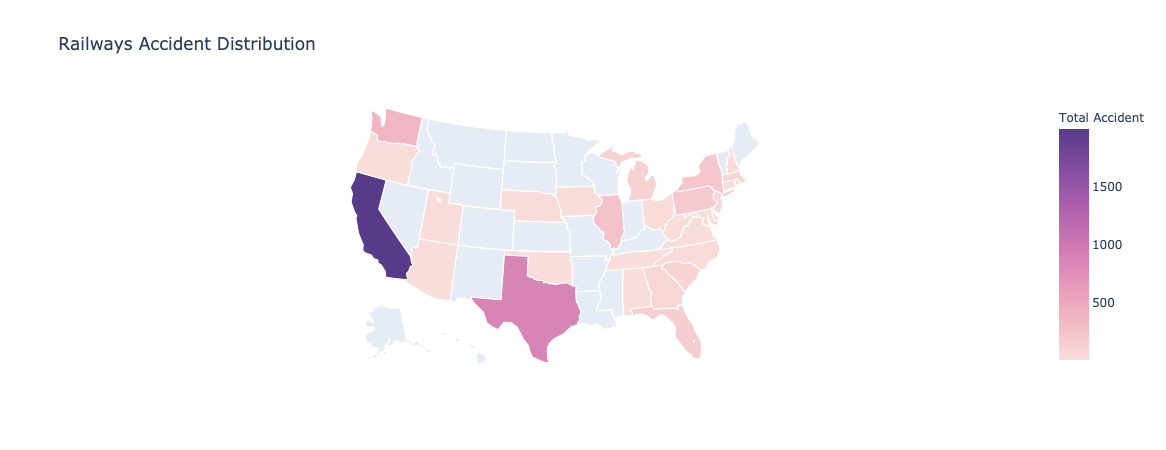

In [56]:
accident_due_railways_count = accident_due_railways.groupby(['State'])['ID'].count().to_frame(name="Count").reset_index()
plot_state_wise_usa_count(accident_due_railways_count, "Railways Accident Distribution", "purpor")

# Accident Happening at Traffic Signal

In [51]:
accident_happen_at_traffic_signal = us_road_accident_df_0.loc[us_road_accident_df_0['Traffic_Signal']==True]
accident_happen_at_traffic_signal.head()

Unnamed: 0    ID  Severity           Start_Time             End_Time  \
2            2   A-3         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
4            4   A-5         2  2016-02-08 07:39:07  2016-02-08 08:09:07   
13          13  A-14         2  2016-02-08 08:37:07  2016-02-08 09:07:07   
14          14  A-15         2  2016-02-08 08:39:43  2016-02-08 09:09:43   
18          18  A-19         2  2016-02-08 09:25:17  2016-02-08 09:55:17   

    Start_Lat  Start_Lng                     Street Side          City  ...  \
2   39.063148 -84.032608             State Route 32    R  Williamsburg  ...   
4   39.627781 -84.188354  Miamisburg Centerville Rd    R        Dayton  ...   
13  39.790760 -84.241547                  Salem Ave    L        Dayton  ...   
14  39.972038 -82.913521                 E Broad St    L      Columbus  ...   
18  39.740669 -84.184135                 Rubicon St    L        Dayton  ...   

   Roundabout Station   Stop Traffic_Calming Traffic_Signal Turning_Loop  \
2       False   False  False           False           True        False   
4       False   False  False           False           True        False   
13      False   False  False           False           True        False   
14      False   False  False           False           True        False   
18      False   False  False           False           True        False   

   Sunrise_Sunset            countyState  State_FIPS_Code  County_FIPS_Code  
2           Night    Clermont County, OH               39               025  
4             Day  Montgomery County, OH               39               113  
13            Day  Montgomery County, OH               39               113  
14            Day    Franklin County, OH               39               049  
18            Day  Montgomery County, OH               39               113  

[5 rows x 40 columns]

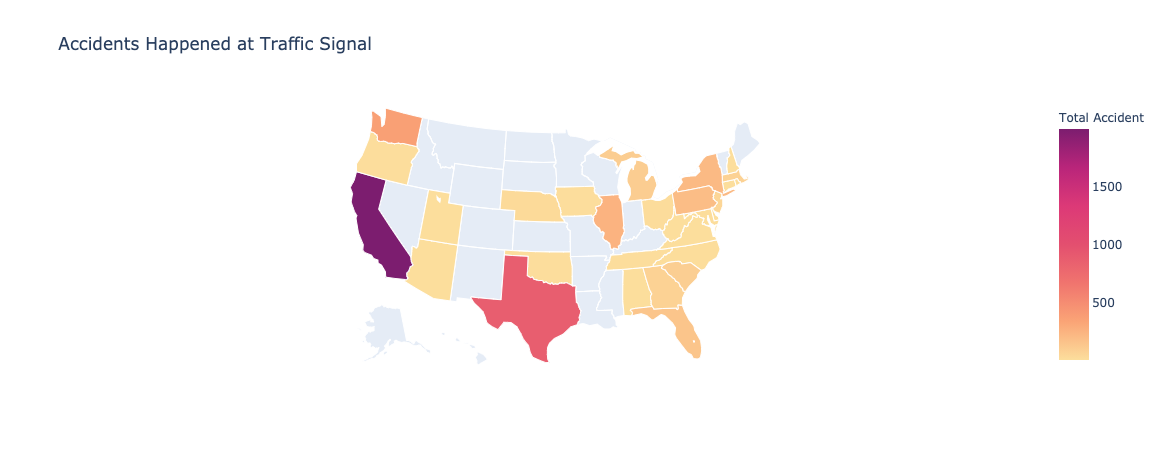

In [60]:
trafiic_signal_accident_count = accident_due_railways.groupby(['State'])['ID'].count().to_frame(name="Count").reset_index()
plot_state_wise_usa_count(trafiic_signal_accident_count, "Accidents Happened at Traffic Signal", "sunsetdark")

# Accident Happening on Stop Sign

In [57]:
accident_happen_at_stop_sign = us_road_accident_df_0.loc[us_road_accident_df_0['Stop']==True]
accident_happen_at_stop_sign.head()

Unnamed: 0     ID  Severity           Start_Time             End_Time  \
90           90   A-91         2  2016-02-11 06:20:28  2016-02-11 06:50:28   
284         284  A-285         2  2016-02-19 08:05:52  2016-02-19 08:35:52   
311         311  A-312         2  2016-02-22 08:04:43  2016-02-22 08:34:43   
644         644  A-647         2  2016-03-14 09:22:34  2016-03-14 09:52:34   
786         790  A-793         2  2016-06-21 15:09:59  2016-06-21 15:54:59   

     Start_Lat   Start_Lng            Street Side           City  ...  \
90   38.994080  -84.142021       S Bantam Rd    L         Bethel  ...   
284  41.375961  -83.647453        E Court St    L  Bowling Green  ...   
311  39.981968  -83.008698         W 2nd Ave    R       Columbus  ...   
644  41.383537  -83.641235        Frazee Ave    L  Bowling Green  ...   
786  39.328636 -121.111160  State Highway 49    R    Nevada City  ...   

    Roundabout Station  Stop Traffic_Calming Traffic_Signal Turning_Loop  \
90       False   False  True           False          False        False   
284      False   False  True           False          False        False   
311      False   False  True           False          False        False   
644      False   False  True           False          False        False   
786      False   False  True           False          False        False   

    Sunrise_Sunset          countyState  State_FIPS_Code  County_FIPS_Code  
90           Night  Clermont County, OH               39               025  
284            Day      Wood County, OH               39               173  
311            Day  Franklin County, OH               39               049  
644            Day      Wood County, OH               39               173  
786            Day    Nevada County, CA               06               057  

[5 rows x 40 columns]

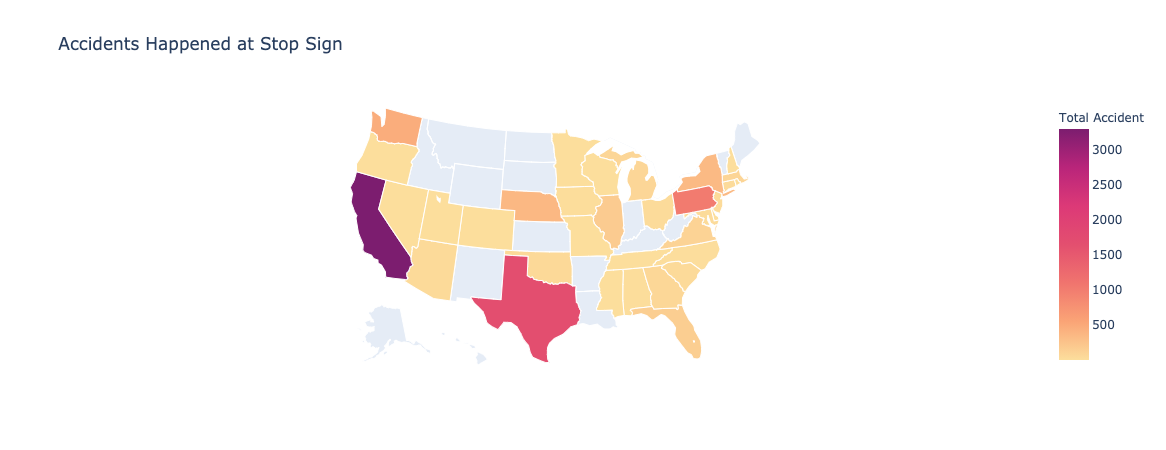

In [62]:
stop_accident_count = accident_happen_at_stop_sign.groupby(['State'])['ID'].count().to_frame(name="Count").reset_index()
plot_state_wise_usa_count(stop_accident_count, "Accidents Happened at Stop Sign", "sunsetdark")

# Accident Happening while Crossing

In [63]:
accident_happen_while_crossing = us_road_accident_df_0.loc[us_road_accident_df_0['Crossing']==True]
accident_happen_while_crossing.head()

Unnamed: 0    ID  Severity           Start_Time             End_Time  \
18          18  A-19         2  2016-02-08 09:25:17  2016-02-08 09:55:17   
41          41  A-42         2  2016-02-09 05:47:16  2016-02-09 06:17:16   
70          70  A-71         2  2016-02-09 11:09:37  2016-02-09 11:39:37   
74          74  A-75         2  2016-02-10 06:53:02  2016-02-10 07:23:02   
92          92  A-93         2  2016-02-11 07:17:58  2016-02-11 07:47:58   

    Start_Lat  Start_Lng              Street Side      City  ... Roundabout  \
18  39.740669 -84.184135          Rubicon St    L    Dayton  ...      False   
41  39.787731 -84.173439        Air City Ave    R    Dayton  ...      False   
70  41.022358 -83.650345           S Main St    L   Findlay  ...      False   
74  39.814526 -84.021744       S Central Ave    R  Fairborn  ...      False   
92  40.030342 -83.030197  Olentangy River Rd    R  Columbus  ...      False   

   Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
18   False  False           False           True        False            Day   
41   False  False           False           True        False          Night   
70   False  False           False           True        False            Day   
74   False  False           False          False        False          Night   
92   False  False           False          False        False          Night   

              countyState  State_FIPS_Code  County_FIPS_Code  
18  Montgomery County, OH               39               113  
41  Montgomery County, OH               39               113  
70     Hancock County, OH               39               063  
74      Greene County, OH               39               057  
92    Franklin County, OH               39               049  

[5 rows x 40 columns]

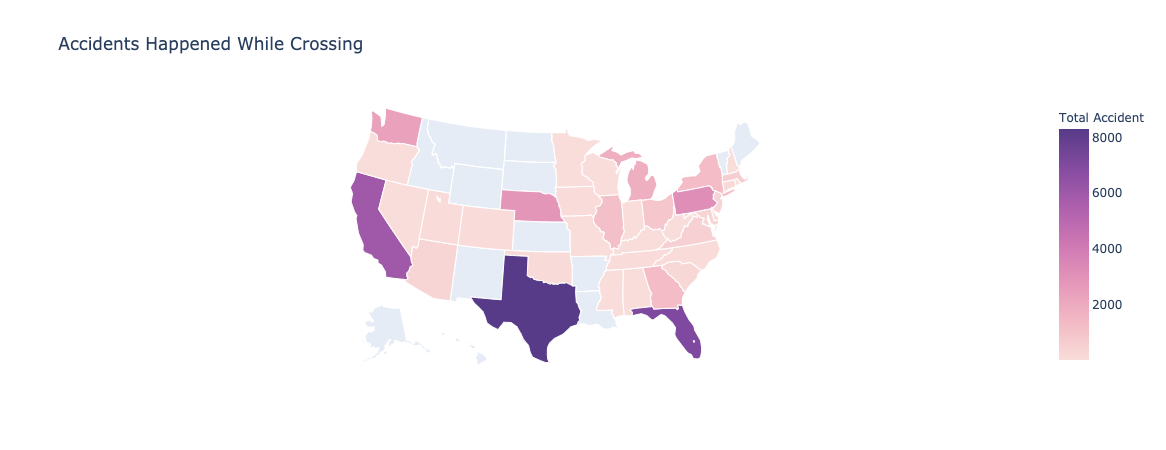

In [66]:
crossing_accident_count = accident_happen_while_crossing.groupby(['State'])['ID'].count().to_frame(name="Count").reset_index()
plot_state_wise_usa_count(crossing_accident_count, "Accidents Happened While Crossing", "purpor")

# Accidents Happening at Left Side

In [68]:
accident_happened_on_left_side = us_road_accident_df_0.loc[us_road_accident_df_0['Side']=="L"]
accident_happened_on_left_side.head()

Unnamed: 0    ID  Severity           Start_Time             End_Time  \
1            1   A-2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
8            8   A-9         2  2016-02-08 08:00:40  2016-02-08 08:30:40   
13          13  A-14         2  2016-02-08 08:37:07  2016-02-08 09:07:07   
14          14  A-15         2  2016-02-08 08:39:43  2016-02-08 09:09:43   
18          18  A-19         2  2016-02-08 09:25:17  2016-02-08 09:55:17   

    Start_Lat  Start_Lng          Street Side          City  ... Roundabout  \
1   39.928059 -82.831184        Brice Rd    L  Reynoldsburg  ...      False   
8   39.778061 -84.172005  Notre Dame Ave    L        Dayton  ...      False   
13  39.790760 -84.241547       Salem Ave    L        Dayton  ...      False   
14  39.972038 -82.913521      E Broad St    L      Columbus  ...      False   
18  39.740669 -84.184135      Rubicon St    L        Dayton  ...      False   

   Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
1    False  False           False          False        False          Night   
8    False  False           False          False        False            Day   
13   False  False           False           True        False            Day   
14   False  False           False           True        False            Day   
18   False  False           False           True        False            Day   

              countyState  State_FIPS_Code  County_FIPS_Code  
1     Franklin County, OH               39               049  
8   Montgomery County, OH               39               113  
13  Montgomery County, OH               39               113  
14    Franklin County, OH               39               049  
18  Montgomery County, OH               39               113  

[5 rows x 40 columns]

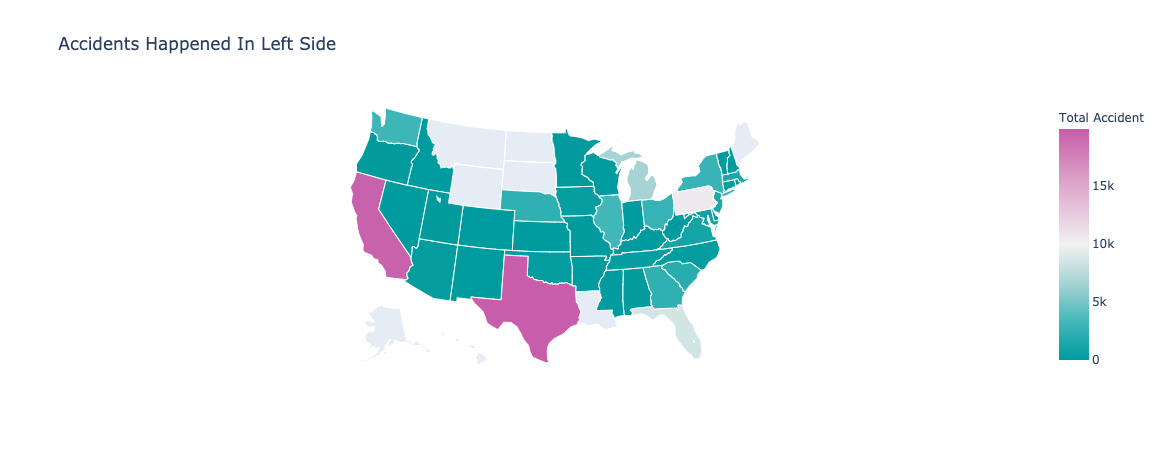

In [71]:
left_accident_count = accident_happened_on_left_side.groupby(['State'])['ID'].count().to_frame(name="Count").reset_index()
plot_state_wise_usa_count(left_accident_count, "Accidents Happened In Left Side", "tropic")

# Looking Florida in More details

In [101]:
accident_happening_in_florida = us_road_accident_df_0.loc[us_road_accident_df_0['State']=="FL"]
accident_happening_in_florida.head()

Unnamed: 0        ID  Severity           Start_Time  \
111195      112478  A-116062         3  2016-11-30 15:36:03   
111196      112479  A-116063         3  2016-11-30 16:25:35   
111197      112480  A-116064         2  2016-11-30 16:40:31   
111198      112481  A-116065         3  2016-11-30 16:34:57   
111199      112482  A-116066         2  2016-11-30 16:38:41   

                   End_Time  Start_Lat  Start_Lng  \
111195  2016-11-30 17:09:22  27.981367 -82.326561   
111196  2016-11-30 17:12:25  27.981367 -82.326561   
111197  2016-11-30 17:10:19  25.627699 -80.374451   
111198  2016-11-30 17:04:27  25.899435 -80.346680   
111199  2016-11-30 17:08:23  26.272926 -80.296432   

                                 Street Side           City  ... Roundabout  \
111195  E Dr Martin Luther King Jr Blvd    R          Tampa  ...      False   
111196  E Dr Martin Luther King Jr Blvd    R          Tampa  ...      False   
111197                      SW 152nd St    R          Miami  ...      False   
111198                           I-75 N    R        Hialeah  ...      False   
111199                    Sawgrass Expy    R  Pompano Beach  ...      False   

       Station   Stop Traffic_Calming Traffic_Signal Turning_Loop  \
111195   False  False           False          False        False   
111196   False  False           False          False        False   
111197   False  False           False           True        False   
111198   False  False           False          False        False   
111199   False  False           False          False        False   

       Sunrise_Sunset              countyState  State_FIPS_Code  \
111195            Day  Hillsborough County, FL               12   
111196            Day  Hillsborough County, FL               12   
111197            Day    Miami-Dade County, FL               12   
111198            Day    Miami-Dade County, FL               12   
111199            Day       Broward County, FL               12   

        County_FIPS_Code  
111195               057  
111196               057  
111197               086  
111198               086  
111199               011  

[5 rows x 40 columns]

In [107]:
accident_happening_in_florida_count = accident_happening_in_florida.groupby(['County',"Severity"])['ID'].count().to_frame(name="Count").reset_index()
accident_happening_in_florida_count.head()

County  Severity  Count
0  Alachua         2     27
1  Alachua         3    130
2    Baker         2      4
3    Baker         3      1
4      Bay         2     17

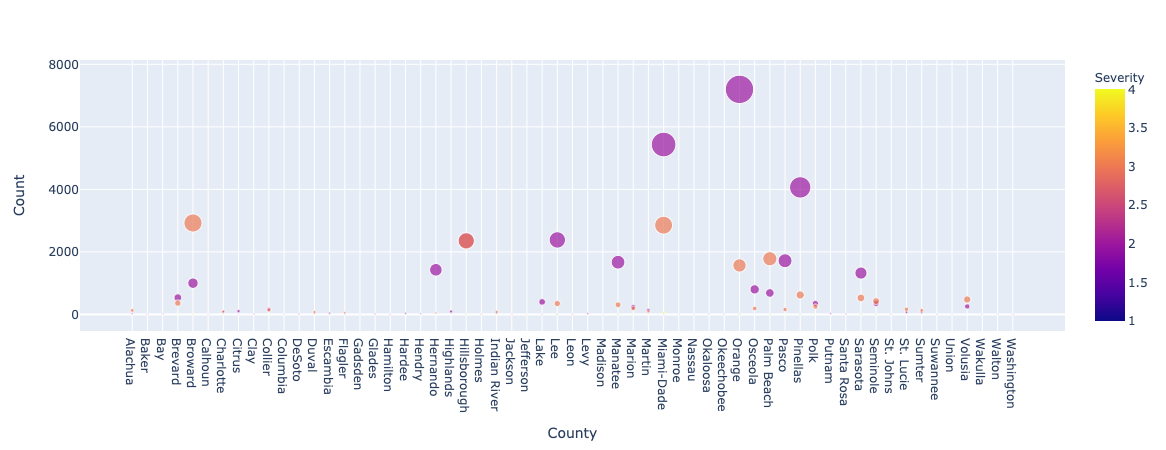

In [108]:
import plotly.express as px
fig = px.scatter(accident_happening_in_florida_count,x="County", y="Count", size="Count", color="Severity",hover_name="County", log_x=False)
fig.show()

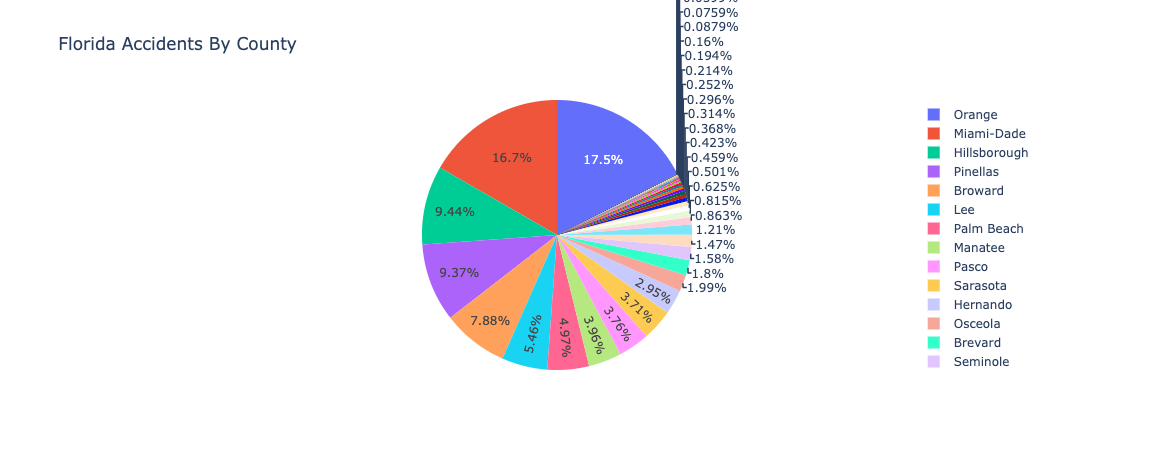

In [109]:
import plotly.express as px
fig = px.pie(accident_happening_in_florida_count, values='Count', names='County', title='Florida Accidents By County')
fig.show()

## Looking more details in wind direction

In [112]:
accident_happening_in_florida_wind_count = accident_happening_in_florida.groupby(["Wind_Direction","Severity"])['ID'].count().to_frame(name="Count").reset_index()
accident_happening_in_florida_wind_count.head()

Wind_Direction  Severity  Count
0           CALM         2    194
1           CALM         3     63
2           CALM         4      2
3           Calm         2   3921
4           Calm         3   1961

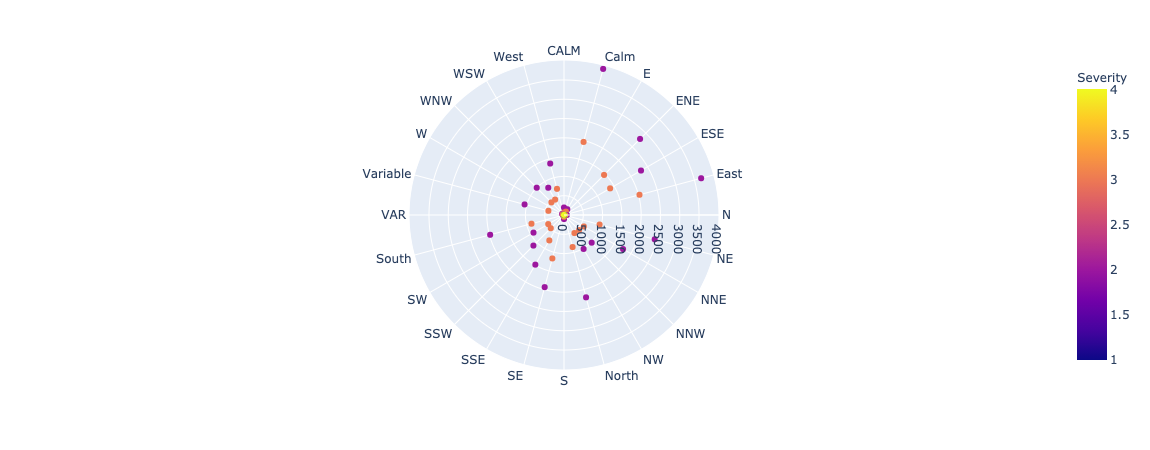

In [115]:
import plotly.express as px
fig = px.scatter_polar(accident_happening_in_florida_wind_count, r="Count", theta="Wind_Direction", color="Severity",
            color_discrete_sequence=px.colors.sequential.Plasma_r)
fig.show()